# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

### Task 1: Importing libraries and Exploring the Dataset.

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt         
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB



### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [3]:
df = pd.read_csv("water_potability - water_potability.csv")
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.58385,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.50849,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.shape

(3276, 10)

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [7]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
True
1434


In [8]:
df.isnull().sum()*100/df.shape[0] 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [9]:
df['ph'].fillna(value=df['ph'].mean(), inplace = True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace = True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace = True)

In [10]:
print (df.isnull().sum())  
print (df.isnull().values.any())
print (df.isnull().values.sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64
False
0


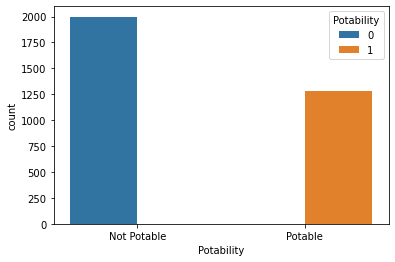

In [11]:
sns.countplot(x = "Potability", hue = "Potability",data=df)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()

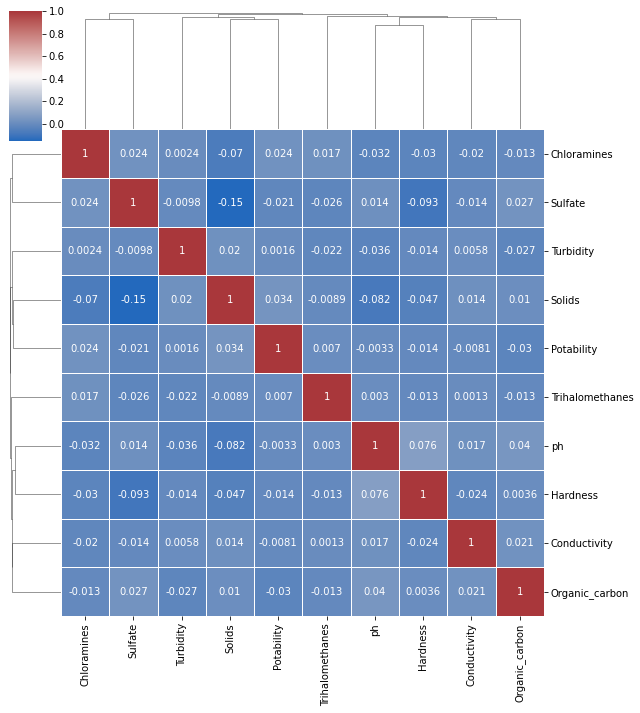

In [12]:
sns.clustermap(df.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2), annot = True, linewidths = .8, figsize = (9,10))
plt.show()

### Task 4: creat a model that fits the data

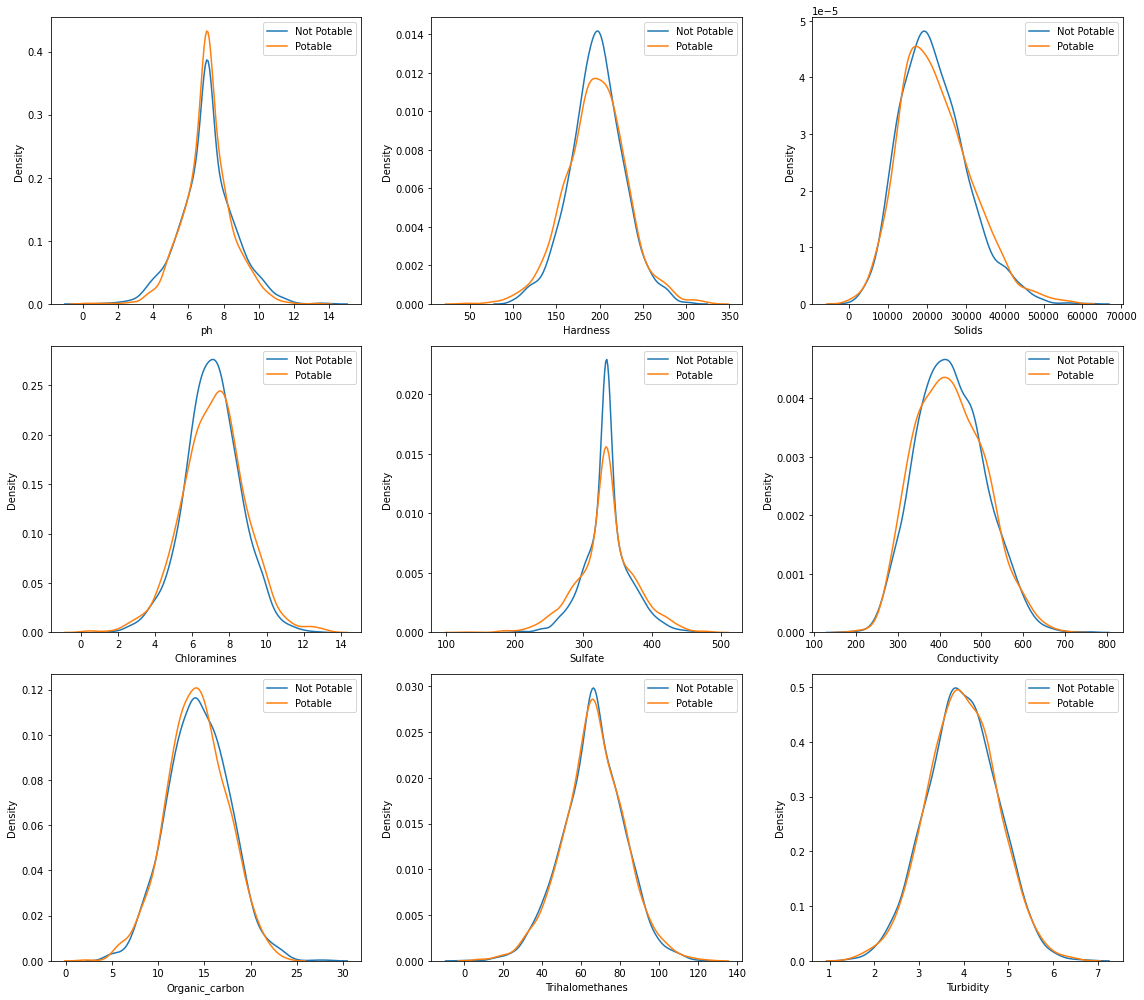

In [13]:
not_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

plt.figure(figsize = (16,14))

for ax, col in enumerate(df.columns[:9]):
  plt.subplot(3,3, ax + 1)
  sns.kdeplot(x = not_potable[col], label = "Not Potable")
  sns.kdeplot(x = potable[col], label = "Potable")
  plt.legend()
plt.tight_layout()

In [14]:
X = df.drop("Potability", axis = 1).values
y = df["Potability"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (2293, 9)
X_test (983, 9)
y_train (2293,)
y_test (983,)


### Task 5: creating an accurecy table

In [17]:
models = [("Decision Tree Classifier"),
          ("Random Forest Classifier",RandomForestClassifier())]

In [18]:
finalResults = []
cmList = []
for name, model in models:
    model.fit(X_train, y_train) 
    model_result = model.predict(X_test) 
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)

    finalResults.append((name, score))
    cmList.append((name, cm))
finalResults

ValueError: too many values to unpack (expected 2)

In [19]:
from sklearn.metrics import classification_report
crr=classification_report(y_test, model_result)
print(cr)

NameError: name 'model_result' is not defined

In [20]:
for name, i in cmList:
    plt.figure()
    sns.heatmap(i, annot = True, linewidths = 0.8, fmt = ".1f")
    plt.title(name)
    plt.show()

In [21]:
model1 = GaussianNB()
model2 = RandomForestClassifier()

In [22]:
model1.fit(X_train, y_train)


GaussianNB()

In [23]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [1]:
model = LogisticRegression(solver='liblinear', C=10.0, randomstate=0)
model.fit(x, y)

NameError: name 'LogisticRegression' is not defined

In [24]:
y_pred1 = model1.predict(X_test)


In [25]:
y_pred2 = model2.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred1)

print(cr)

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       603
           1       0.57      0.23      0.33       380

    accuracy                           0.64       983
   macro avg       0.61      0.56      0.54       983
weighted avg       0.62      0.64      0.59       983



In [27]:
cr2=classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       0.69      0.88      0.77       603
           1       0.66      0.36      0.46       380

    accuracy                           0.68       983
   macro avg       0.67      0.62      0.62       983
weighted avg       0.67      0.68      0.65       983



In [28]:
acc = accuracy_score(y_test, y_pred1)

acc

NameError: name 'accuracy_score' is not defined

In [29]:
acc = accuracy_score(y_test, y_pred2)

acc

NameError: name 'accuracy_score' is not defined